#Trend Analysis of Milk Production of Maharashtra

#Introduction

Maharashtra has the largest livestock population in the world . World milk production is almost entirely derived from cattle, buffaloes, goats. The presence and importance of each species varies significantly among regions and countries. There are different breed of cow are such as exotic, cross bred , indigenous. The population of milk animals are important strength of milk production. Milk production will play a vital role in helping the farmers realize the mission of the Union Government with respect to double farmers income and for making India self-reliant or Aatmanirbhar Bharat. It will not only be beneficial for farmers but also the policy makers in planning for future milk demand.

#Objective
1) To Compair Trend in between Summer,Rainy and Winter season

2)To Forecast Milk Production Between 2020 to 2026

#Summary

This project aims to forecast the future milk production of Maharashtra using a dataset obtained from the Indian Statistical Services. The main objective is to understand the historical trends of milk production in Maharashtra and predict future changes. By focusing on Maharashtra, the goal is to assist dairy farmers and other stakeholders in the milk industry in making informed decisions.

In [ ]:
#importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [ ]:
from statsmodels.tsa.api import ExponentialSmoothing,SimpleExpSmoothing,Holt
from sklearn.linear_model import LinearRegression
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# To load the dataset
data = pd.read_csv("/content/Maharashtra Milk production.csv", index_col=0, parse_dates=True)
data

,Crossbreed(Exo)\nSummer\n,Crossbreed(Exo)\nRainy,Crossbreed(exo)\nWinter,Indi.Cow(ND cow)\nSummer,Indi. cow(ND cow)\n(rainy),Ind.cow(ND cow)\nwinter,Buffalo (Ind . &\nSummer,Buffalo (Indi. &ND) Rainy,Buffalo (Indi. &ND) witer,Goat \nSummer,Goat\nRainy,Goat\nwinter,Total\nsummer,Total \nRainy,Total\n Winter,Year_production
Year,,,,,,,,,,,,,,,,
2000-01-01,542.571,559.087,603.608,342.837,373.512,396.108,857.744,926.567,970.864,94.206,95.693,98.115,1837.358,1954.859,2068.695,5860.912
2001-01-01,612.926,625.144,619.963,381.602,386.419,387.148,922.318,934.729,934.842,95.530,98.210,101.012,2012.376,2044.502,2042.965,6099.843
2002-01-01,604.900,655.510,654.198,385.971,397.519,399.151,944.432,954.595,960.263,97.901,100.134,102.813,2033.204,2107.758,2116.425,6257.387
2003-01-01,617.393,670.793,666.727,392.692,405.329,408.505,963.289,973.133,978.441,90.765,93.088,94.997,2064.139,2142.343,2148.670,6355.152
2004-01-01,740.916,786.513,784.425,333.869,342.568,338.023,975.849,993.774,992.206,89.355,93.940,98.521,2139.989,2216.795,2213.175,6569.959
2005-01-01,789.156,825.714,804.886,317.115,351.017,372.975,994.656,1018.160,1013.738,88.364,93.765,98.796,2189.291,2288.656,2290.395,6768.342
2006-01-01,843.020,886.093,860.484,303.416,343.675,371.601,1013.894,1040.050,1034.496,88.364,98.796,98.796,2248.694,2368.614,2365.377,6982.685
2007-01-01,870.967,932.586,959.677,306.105,354.185,373.482,1030.613,1046.591,1070.196,86.616,88.086,90.644,2294.301,2421.448,2493.999,7209.748
2008-01-01,887.124,936.341,993.701,312.219,363.893,390.136,1052.480,1114.945,1127.070,87.884,92.810,96.554,2339.707,2507.989,2607.461,7455.157


In [ ]:
data.head()

,Crossbreed(Exo)\nSummer\n,Crossbreed(Exo)\nRainy,Crossbreed(exo)\nWinter,Indi.Cow(ND cow)\nSummer,Indi. cow(ND cow)\n(rainy),Ind.cow(ND cow)\nwinter,Buffalo (Ind . &\nSummer,Buffalo (Indi. &ND) Rainy,Buffalo (Indi. &ND) witer,Goat \nSummer,Goat\nRainy,Goat\nwinter,Total\nsummer,Total \nRainy,Total\n Winter,Year_production
Year,,,,,,,,,,,,,,,,
2000-01-01,542.571,559.087,603.608,342.837,373.512,396.108,857.744,926.567,970.864,94.206,95.693,98.115,1837.358,1954.859,2068.695,5860.912
2001-01-01,612.926,625.144,619.963,381.602,386.419,387.148,922.318,934.729,934.842,95.530,98.210,101.012,2012.376,2044.502,2042.965,6099.843
2002-01-01,604.900,655.510,654.198,385.971,397.519,399.151,944.432,954.595,960.263,97.901,100.134,102.813,2033.204,2107.758,2116.425,6257.387
2003-01-01,617.393,670.793,666.727,392.692,405.329,408.505,963.289,973.133,978.441,90.765,93.088,94.997,2064.139,2142.343,2148.670,6355.152
2004-01-01,740.916,786.513,784.425,333.869,342.568,338.023,975.849,993.774,992.206,89.355,93.940,98.521,2139.989,2216.795,2213.175,6569.959


In [ ]:
# Rename the Column
d1 = data.rename(columns={"Total\nsummer":"Summer_production"},inplace=True)
d1

In [ ]:
d1 = data.rename(columns={"Crossbreed(Exo)\nSummer\n":"Crossbreed_summer"},inplace=True)
d1

In [ ]:
d1 = data.rename(columns={"Indi.Cow(ND cow)\nSummer":"Indi_summer"},inplace=True)
d1

In [ ]:
d1 = data.rename(columns={"Buffalo (Indi. &ND) witer":"Buffalo_winter"},inplace=True)
d1

In [ ]:
d1 = data.rename(columns={"Goat\nwinter":"Goat_winter"},inplace=True)
d1

In [ ]:
d1 = data.rename(columns={"Goat\nRainy":"Goat_Rainy"},inplace=True)
d1

In [ ]:
d1 = data.rename(columns={"Goat \nSummer":"Goat_summer"},inplace=True)
d1

In [ ]:
d1 = data.rename(columns={"Buffalo (Ind . &\nSummer":"Buffalo_summer"},inplace=True)
d1

In [ ]:
d1 = data.rename(columns={"Buffalo (Indi. &ND) Rainy":"Buffalo_Rainy"},inplace=True)
d1

In [ ]:
d1 = data.rename(columns={"Indi. cow(ND cow)\n(rainy)":"Indi_Rainy"},inplace=True)
d1

In [ ]:
d1 = data.rename(columns={"Buffalo (Indi. &ND) witer":"Buffalo_winter"},inplace=True)
d1

In [ ]:
d1 = data.rename(columns={"Goat\nwinter":"Goat_winter"},inplace=True)
d1

In [ ]:
d1 = data.rename(columns={"Goat\nRainy":"Goat_Rainy"},inplace=True)
d1

In [ ]:
d1 = data.rename(columns={"Goat \nSummer":"Goat_summer"},inplace=True)
d1

In [ ]:
d1 = data.rename(columns={"Buffalo (Ind . &\nSummer":"Buffalo_summer"},inplace=True)
d1

In [ ]:
d1 = data.rename(columns={"Buffalo (Indi. &ND) Rainy":"Buffalo_Rainy"},inplace=True)
d1

In [ ]:
d1 = data.rename(columns={"Indi. cow(ND cow)\n(rainy)":"Indi_Rainy"},inplace=True)
d1

In [ ]:
d1 = data.rename(columns={"Ind.cow(ND cow)\nwinter":"Indi_winter"},inplace=True)
d1


In [ ]:
d1 = data.rename(columns={"Crossbreed(exo)\nWinter":"Crossbreed_winter"},inplace=True)
d1

In [ ]:
d1 = data.rename(columns={"Crossbreed(Exo)\nRainy":"Crossbreed_Rainy"},inplace=True)
d1

In [ ]:
d1 = data.rename(columns={"Total\n Winter":"Winter_production"},inplace=True)
d1

In [ ]:
d1 = data.rename(columns={"Total \nRainy":"Rainy_production"},inplace=True)
d1

In [ ]:
data

,Crossbreed_summer,Crossbreed_Rainy,Crossbreed_winter,Indi_summer,Indi_Rainy,Indi_winter,Buffalo_summer,Buffalo_Rainy,Buffalo_winter,Goat_summer,Goat_Rainy,Goat_winter,Summer_production,Rainy_production,Winter_production,Year_production
Year,,,,,,,,,,,,,,,,
2000-01-01,542.571,559.087,603.608,342.837,373.512,396.108,857.744,926.567,970.864,94.206,95.693,98.115,1837.358,1954.859,2068.695,5860.912
2001-01-01,612.926,625.144,619.963,381.602,386.419,387.148,922.318,934.729,934.842,95.530,98.210,101.012,2012.376,2044.502,2042.965,6099.843
2002-01-01,604.900,655.510,654.198,385.971,397.519,399.151,944.432,954.595,960.263,97.901,100.134,102.813,2033.204,2107.758,2116.425,6257.387
2003-01-01,617.393,670.793,666.727,392.692,405.329,408.505,963.289,973.133,978.441,90.765,93.088,94.997,2064.139,2142.343,2148.670,6355.152
2004-01-01,740.916,786.513,784.425,333.869,342.568,338.023,975.849,993.774,992.206,89.355,93.940,98.521,2139.989,2216.795,2213.175,6569.959
2005-01-01,789.156,825.714,804.886,317.115,351.017,372.975,994.656,1018.160,1013.738,88.364,93.765,98.796,2189.291,2288.656,2290.395,6768.342
2006-01-01,843.020,886.093,860.484,303.416,343.675,371.601,1013.894,1040.050,1034.496,88.364,98.796,98.796,2248.694,2368.614,2365.377,6982.685
2007-01-01,870.967,932.586,959.677,306.105,354.185,373.482,1030.613,1046.591,1070.196,86.616,88.086,90.644,2294.301,2421.448,2493.999,7209.748
2008-01-01,887.124,936.341,993.701,312.219,363.893,390.136,1052.480,1114.945,1127.070,87.884,92.810,96.554,2339.707,2507.989,2607.461,7455.157


In [ ]:
# The describe() method provides summary statistics of the numerical columns in the DataFrame 'data'.
# This summary helps in understanding the distribution and central tendency of the data.
data.describe()

,Crossbreed_summer,Crossbreed_Rainy,Crossbreed_winter,Indi_summer,Indi_Rainy,Indi_winter,Buffalo_summer,Buffalo_Rainy,Buffalo_winter,Goat_summer,Goat_Rainy,Goat_winter,Summer_production,Rainy_production,Winter_production,Year_production
count,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.00000,20.000000,20.00000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000
mean,1009.201950,1129.085550,1212.412950,380.406400,409.729850,441.479850,1113.70330,1161.240550,1200.46855,85.623450,91.287250,92.144300,2588.935100,2791.343200,2946.505650,8326.783950
std,322.303902,443.592562,547.608802,49.667983,46.904045,71.648649,157.64578,173.056941,204.47846,11.087737,7.394635,9.600978,505.938374,644.333266,806.613567,1942.975094
min,542.571000,559.087000,603.608000,303.416000,342.568000,338.023000,857.74400,926.567000,934.84200,58.857000,75.027000,74.190000,1837.358000,1954.859000,2042.965000,5860.912000
25%,777.096000,815.913750,799.770750,335.451500,371.107250,389.389000,989.95425,1012.063500,1008.35500,85.168000,87.667250,86.224500,2176.965500,2270.690750,2271.090000,6718.746250
50%,951.853500,1002.476000,1027.465500,389.331500,408.420500,427.469000,1079.91450,1156.916500,1177.58050,88.859500,92.949000,95.775500,2475.279500,2655.528500,2730.315500,7861.123500
75%,1260.241250,1380.463750,1476.625000,420.926000,440.330000,472.654250,1266.53200,1283.150750,1332.34725,93.347000,96.303750,98.796000,3069.830500,3251.623500,3318.579250,9694.609250
max,1544.559000,2041.447000,2376.236000,455.853000,480.944000,575.419000,1373.01200,1473.723000,1553.28000,97.901000,103.836000,105.740000,3400.627000,4071.141000,4582.621000,12024.259000


In [ ]:
# The head() method displays the first few rows of the DataFrame 'data'.
data.head()

,Crossbreed_summer,Crossbreed_Rainy,Crossbreed_winter,Indi_summer,Indi_Rainy,Indi_winter,Buffalo_summer,Buffalo_Rainy,Buffalo_winter,Goat_summer,Goat_Rainy,Goat_winter,Summer_production,Rainy_production,Winter_production,Year_production
Year,,,,,,,,,,,,,,,,
2000-01-01,542.571,559.087,603.608,342.837,373.512,396.108,857.744,926.567,970.864,94.206,95.693,98.115,1837.358,1954.859,2068.695,5860.912
2001-01-01,612.926,625.144,619.963,381.602,386.419,387.148,922.318,934.729,934.842,95.530,98.210,101.012,2012.376,2044.502,2042.965,6099.843
2002-01-01,604.900,655.510,654.198,385.971,397.519,399.151,944.432,954.595,960.263,97.901,100.134,102.813,2033.204,2107.758,2116.425,6257.387
2003-01-01,617.393,670.793,666.727,392.692,405.329,408.505,963.289,973.133,978.441,90.765,93.088,94.997,2064.139,2142.343,2148.670,6355.152
2004-01-01,740.916,786.513,784.425,333.869,342.568,338.023,975.849,993.774,992.206,89.355,93.940,98.521,2139.989,2216.795,2213.175,6569.959


In [ ]:
#checking duplicate values in data
data.duplicated().sum()


0

In [ ]:
# The isnull() method is used to detect missing or null values in the DataFrame 'data'.
data.isnull().sum()

Crossbreed_summer    0
Crossbreed_Rainy     0
Crossbreed_winter    0
Indi_summer          0
Indi_Rainy           0
Indi_winter          0
Buffalo_summer       0
Buffalo_Rainy        0
Buffalo_winter       0
Goat_summer          0
Goat_Rainy           0
Goat_winter          0
Summer_production    0
Rainy_production     0
Winter_production    0
Year_production      0
dtype: int64

In [ ]:
# Calculate the correlation matrix
correlation_matrix = data.corr()
print(correlation_matrix)

                   Crossbreed_summer  Crossbreed_Rainy  Crossbreed_winter  \
Crossbreed_summer           1.000000          0.969333           0.941918   
Crossbreed_Rainy            0.969333          1.000000           0.993354   
Crossbreed_winter           0.941918          0.993354           1.000000   
Indi_summer                 0.712774          0.742513           0.755553   
Indi_Rainy                  0.830828          0.838043           0.830915   
Indi_winter                 0.825194          0.895979           0.915389   
Buffalo_summer              0.968523          0.959443           0.949449   
Buffalo_Rainy               0.943214          0.944975           0.945689   
Buffalo_winter              0.951642          0.961546           0.963718   
Goat_summer                -0.735760         -0.853631          -0.876204   
Goat_Rainy                 -0.680300         -0.736346          -0.738321   
Goat_winter                -0.682119         -0.693220          -0.701364   

In [ ]:
# Display information about the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 20 entries, 2000-01-01 to 2019-01-01
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Crossbreed_summer  20 non-null     float64
 1   Crossbreed_Rainy   20 non-null     float64
 2   Crossbreed_winter  20 non-null     float64
 3   Indi_summer        20 non-null     float64
 4   Indi_Rainy         20 non-null     float64
 5   Indi_winter        20 non-null     float64
 6   Buffalo_summer     20 non-null     float64
 7   Buffalo_Rainy      20 non-null     float64
 8   Buffalo_winter     20 non-null     float64
 9   Goat_summer        20 non-null     float64
 10  Goat_Rainy         20 non-null     float64
 11  Goat_winter        20 non-null     float64
 12  Summer_production  20 non-null     float64
 13  Rainy_production   20 non-null     float64
 14  Winter_production  20 non-null     float64
 15  Year_production    20 non-null     float64
dtypes: float

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 [Text(1, 0, 'Crossbreed_summer'),
  Text(2, 0, 'Crossbreed_Rainy'),
  Text(3, 0, 'Crossbreed_winter'),
  Text(4, 0, 'Indi_summer'),
  Text(5, 0, 'Indi_Rainy'),
  Text(6, 0, 'Indi_winter'),
  Text(7, 0, 'Buffalo_summer'),
  Text(8, 0, 'Buffalo_Rainy'),
  Text(9, 0, 'Buffalo_winter'),
  Text(10, 0, 'Goat_summer'),
  Text(11, 0, 'Goat_Rainy'),
  Text(12, 0, 'Goat_winter'),
  Text(13, 0, 'Summer_production'),
  Text(14, 0, 'Rainy_production'),
  Text(15, 0, 'Winter_production'),
  Text(16, 0, 'Year_production')])

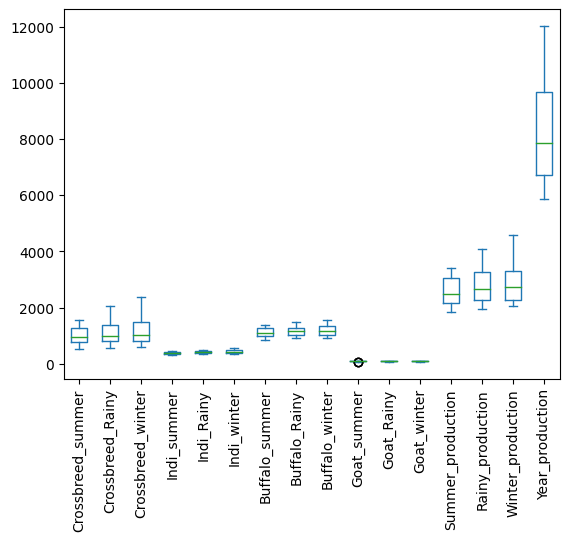

In [ ]:
# The plot() method with kind="box" is used to create a box plot for each numerical column in the DataFrame 'data'.
# Box plots provide a visual summary of the central tendency, dispersion, and skewness of the data distribution,
# as well as identify potential outliers.
# The rotation="vertical" argument in plt.xticks() is used to rotate the x-axis labels vertically for better readability.

data.plot(kind="box")
plt.xticks(rotation = "vertical")

(array([1]), [Text(1, 0, 'Year_production')])

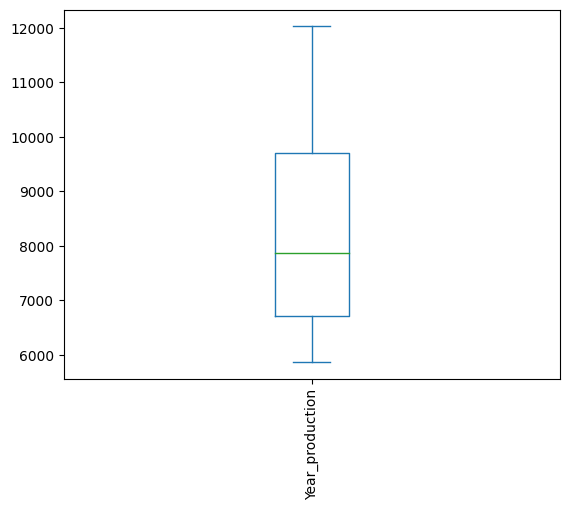

In [ ]:
data["Year_production"].plot(kind="box")
plt.xticks(rotation = "vertical")

Text(0, 0.5, 'Summer_production')

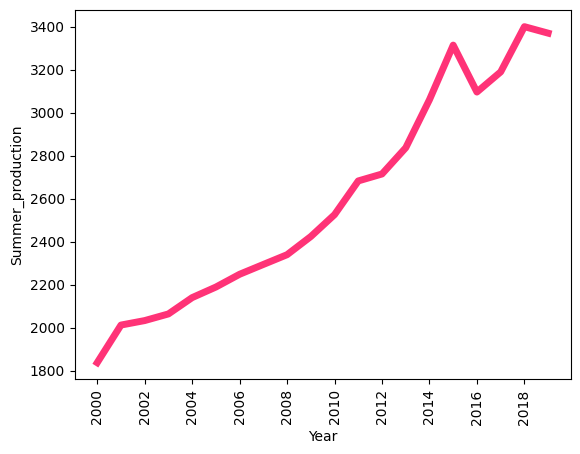

In [ ]:
# The plt.plot() function is used to plot the "Summer_production" data from the DataFrame 'data'.
plt.plot(data["Summer_production"],linestyle="solid",linewidth = 5,color= "#FF3377",label="Total_summer")
plt.xticks(rotation ="vertical")
plt.xlabel("Year")
plt.ylabel("Summer_production")

Text(0, 0.5, 'Winter_production')

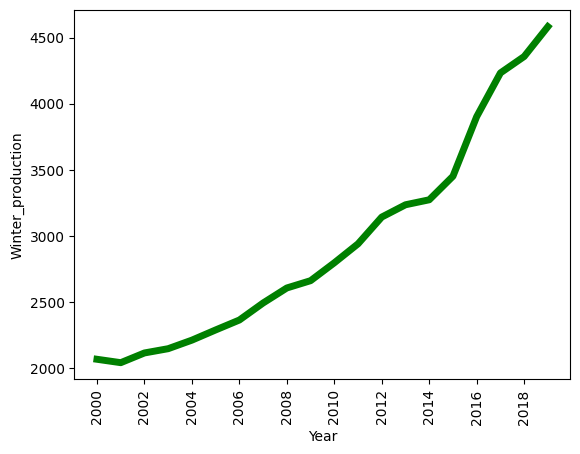

In [ ]:
# The plt.plot() function is used to plot the "Winter_production" data from the DataFrame 'data'.
plt.plot(data["Winter_production"],linestyle="solid",linewidth = 5,color= "Green",label="Total_winter")
plt.xticks(rotation ="vertical")
plt.xlabel("Year")
plt.ylabel("Winter_production")


Text(0, 0.5, 'Rainy_production')

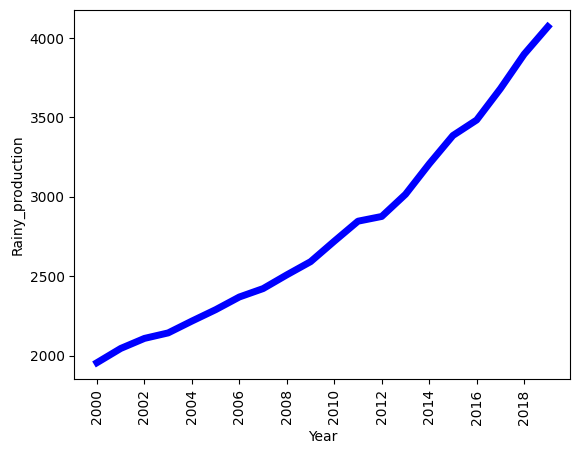

In [ ]:
# The plt.plot() function is used to plot the "Rainy_production" data from the DataFrame 'data'.
plt.plot(data["Rainy_production"],linestyle="solid",linewidth = 5,color= "Blue",label="Total_Rainy")
plt.xticks(rotation ="vertical")
plt.xlabel("Year")
plt.ylabel("Rainy_production")

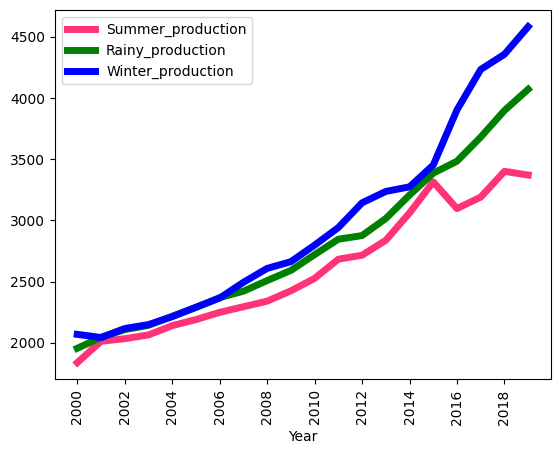

In [ ]:
# This plot compair seasonwisw production

plt.plot(data["Summer_production"],linestyle="solid",linewidth = 5,color= "#FF3377",label="Summer_production")
plt.xticks(rotation ="vertical")
plt.xlabel("Year")


plt.plot(data["Rainy_production"],linestyle="solid",linewidth = 5,color= "green",label="Rainy_production")
plt.xticks(rotation ="vertical")
plt.xlabel("Year")


plt.plot(data["Winter_production"],linestyle="solid",linewidth = 5,color= "blue",label="Winter_production")
plt.xticks(rotation ="vertical")
plt.xlabel("Year")


plt.legend()
plt.show()

This Plot show the Trend line of Summer,Rainy and Winter Season . This plot show that maximum production is done in Winter season compair to Summer and Rainy season

In [ ]:
new_data=data[["Year_production"]]
new_data

,Year_production
Year,
2000-01-01,5860.912
2001-01-01,6099.843
2002-01-01,6257.387
2003-01-01,6355.152
2004-01-01,6569.959
2005-01-01,6768.342
2006-01-01,6982.685
2007-01-01,7209.748
2008-01-01,7455.157


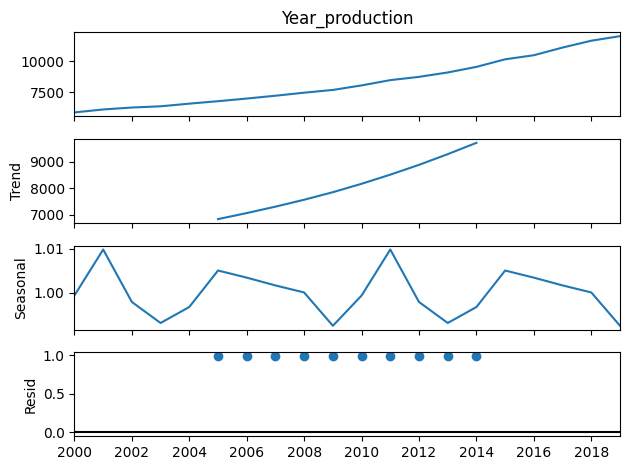

In [ ]:
# Decompose the time series data for "Year_production" using a multiplicative model
# with a seasonal period of 10
import statsmodels.api as sm

res = sm.tsa.seasonal_decompose(new_data["Year_production"], model="multiplicative",period=10)
resplot = res.plot()

These plot show that our data contain Trend as well as seasonality occurs.

In [ ]:
# To check if the data is stationary or not using the Augmented Dickey-Fuller (ADF) test
from statsmodels.tsa.stattools import adfuller

# Perform the ADF test on the "Year_production" data
result = adfuller(new_data["Year_production"])

# Print ADF Statistic and p-value
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

# Print Critical Test Statistics Values
print('Critical Test Statistics Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

# Interpret the results to determine if the data is stationary
# The data is considered stationary if the p-value is less than a significance level (e.g., 0.05)
# and if the ADF Statistic is less than the critical values at the chosen significance level
if result[1] < 0.05 and result[0] < result[4]['5%']:
    print("The data is stationary.")
else:
    print("The data is not stationary.")


ADF Statistic: -0.343546
p-value: 0.919106
Critical Test Statistics Values:
	1%: -4.223
	5%: -3.189
	10%: -2.730
The data is not stationary.


In [ ]:
new_data = data["Year_production"]

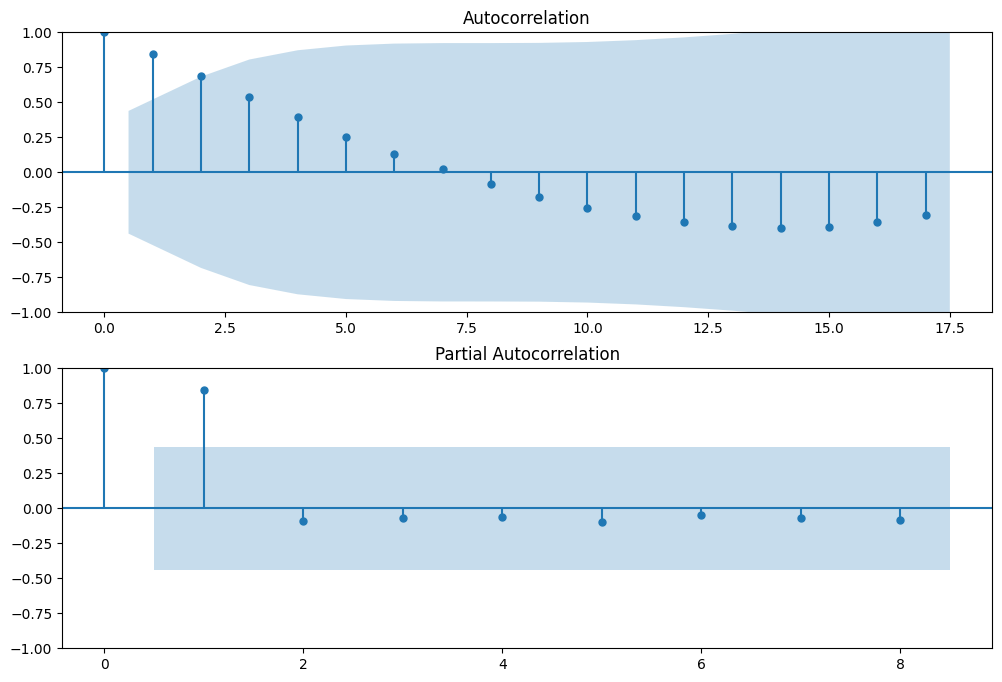

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import statsmodels.api as sm
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(new_data,lags=17,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(new_data,lags=8,ax=ax2)

#To make Data Stationary

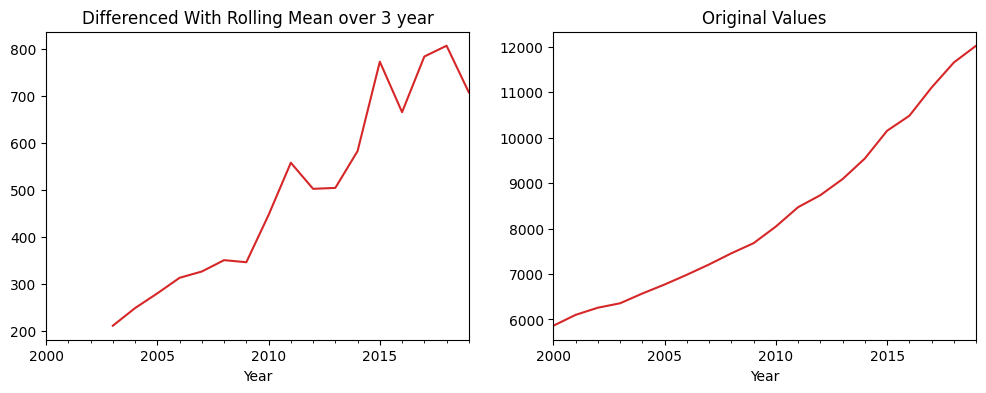

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

rolling_mean = new_data["Year_production"].rolling(window = 4).mean()
summer_detrend = new_data["Year_production"] - rolling_mean

ax1 = plt.subplot(121)
summer_detrend.plot(figsize=(12,4),color="tab:red", title="Differenced With Rolling Mean over 3 year", ax=ax1);
ax2 = plt.subplot(122)
new_data["Year_production"].plot(figsize=(12,4), color="tab:red", title="Original Values", ax=ax2);

In [ ]:
production=summer_detrend.diff().dropna()

In [ ]:
production

Year
2004-01-01     37.54525
2005-01-01     31.25825
2006-01-01     33.01850
2007-01-01     13.41400
2008-01-01     24.10950
2009-01-01     -4.40725
2010-01-01    100.47325
2011-01-01    111.00500
2012-01-01    -55.47950
2013-01-01      1.96675
2014-01-01     78.30025
2015-01-01    189.94100
2016-01-01   -107.29700
2017-01-01    118.25700
2018-01-01     22.97500
2019-01-01    -99.14075
Name: Year_production, dtype: float64

In [ ]:
# To check if the data is stationary or not using the Augmented Dickey-Fuller (ADF) test
from statsmodels.tsa.stattools import adfuller

# Perform the ADF test on the "Year_production" data
result = adfuller(production)

# Print ADF Statistic and p-value
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

# Print Critical Test Statistics Values
print('Critical Test Statistics Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

# Interpret the results to determine if the data is stationary
# The data is considered stationary if the p-value is less than a significance level (e.g., 0.05)
# and if the ADF Statistic is less than the critical values at the chosen significance level
if result[1] < 0.05 and result[0] < result[4]['5%']:
    print("The data is stationary.")
else:
    print("The data is not stationary.")


ADF Statistic: -4.069585
p-value: 0.001087
Critical Test Statistics Values:
	1%: -4.473
	5%: -3.290
	10%: -2.772
The data is stationary.


In [ ]:
from statsmodels.tsa.stattools import kpss

# Perform the KPSS test on the "production" data
result_kpss_ct = kpss(production)

# Print Test Statistic and p-value
print('Test Statistic: %f' % result_kpss_ct[0])
print('p-value: %f' % result_kpss_ct[1])

# Print Critical values
print('Critical values:')
for key, value in result_kpss_ct[3].items():
    print('\t%s: %.3f' % (key, value))

# Interpret the results to determine if the data is stationary
# The data is considered stationary if the p-value is greater than a significance level (e.g., 0.05)
# and if the test statistic is less than the critical value at the chosen significance level
if result_kpss_ct[1] > 0.05 and result_kpss_ct[0] < result_kpss_ct[3]['5%']:
    print("The data is stationary according to the KPSS test.")
else:
    print("The data is not stationary according to the KPSS test.")


Test Statistic: 0.163446
p-value: 0.100000
Critical values:
	10%: 0.347
	5%: 0.463
	2.5%: 0.574
	1%: 0.739
The data is stationary according to the KPSS test.


Both test are show that data is stationary

In [ ]:
from scipy.stats import shapiro

# Assume 'data' is your dataset
# Perform the Shapiro-Wilk test
statistic, p_value = shapiro(production)

# Print the test statistic and p-value
print('Test Statistic:', statistic)
print('p-value:', p_value)

# Interpret the results to determine if the data is normally distributed
# The data is considered normally distributed if the p-value is greater than a significance level (e.g., 0.05)
if p_value > 0.05:
    print("The data follows a normal distribution.")
else:
    print("The data does not follow a normal distribution.")


Test Statistic: 0.9626595377922058
p-value: 0.7102152109146118
The data follows a normal distribution.


Data is Normal.

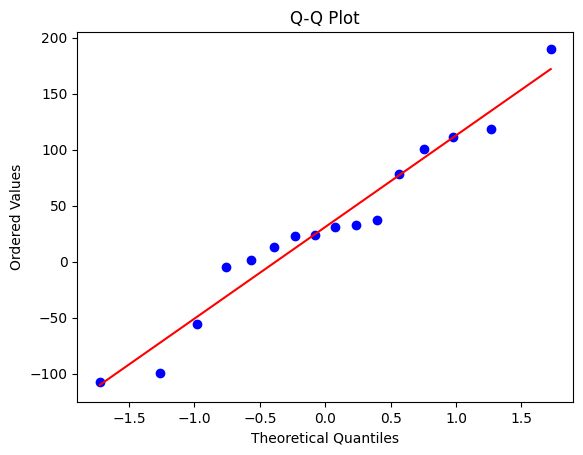

In [ ]:
import scipy.stats as stats
import matplotlib.pyplot as plt

# Assuming 'production' is your dataset

# Create the Q-Q plot
stats.probplot(production, dist="norm", plot=plt)
plt.title('Q-Q Plot')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Ordered Values')
plt.show()


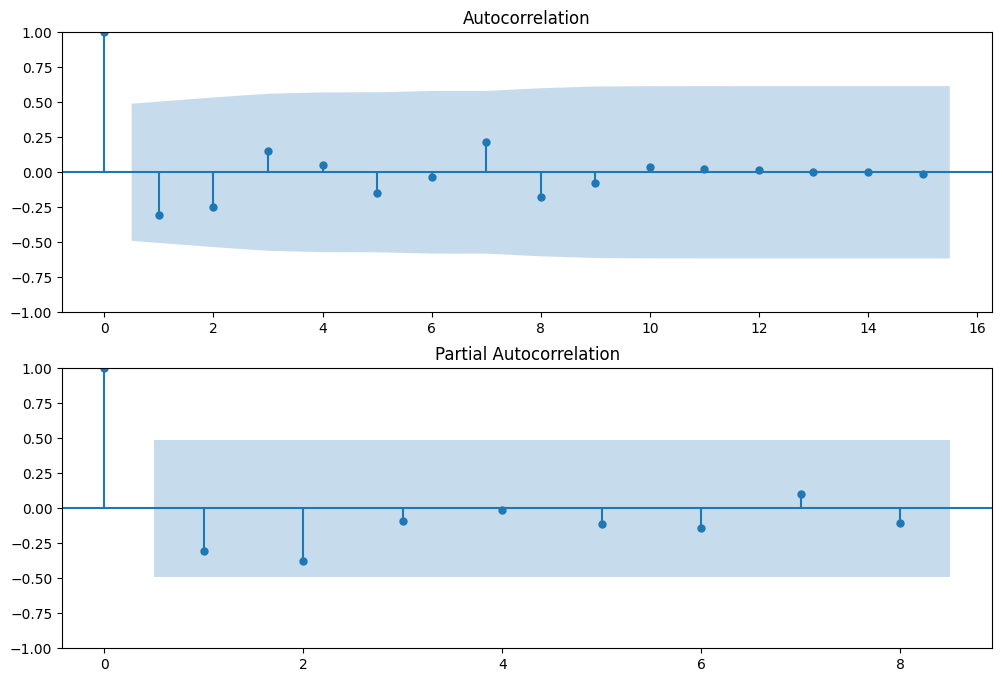

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import statsmodels.api as sm
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(production,lags=15,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(production,lags=8,ax=ax2)

In [ ]:
# Install the pmdarima package using pip
# This package provides an interface for fitting ARIMA models in Python
# and is commonly used for time series analysis and forecasting
!pip install pmdarima




In [ ]:
import pmdarima as pm

Select those parameter whose AIC value is low

In [ ]:
import itertools
import numpy as np
import statsmodels.api as sm


# Define the range of values for each parameter
p_values = range(0, 3)  # Example: 0 to 2
d_values = [1]  # Example: 0 to 1
q_values = range(0, 3)  # Example: 0 to 2
P_values = range(0, 3)  # Example: 0 to 2
D_values = [0]  # Example: 0 to 1
Q_values = range(0, 3)  # Example: 0 to 2
s_values = [7]

# Generate all possible combinations of parameters
parameter_combinations = list(itertools.product(p_values, d_values, q_values, P_values, D_values, Q_values, s_values))

best_aic = np.inf
best_model = None
best_params = None

# Fit SARIMA models for each parameter combination and print AIC
for params in parameter_combinations:
    p, d, q, P, D, Q, s = params
    try:
        model = sm.tsa.SARIMAX(new_data, order=(p, d, q), seasonal_order=(P, D, Q, s), enforce_stationarity=False)
        results = model.fit()
        aic = results.aic
        print("Parameters:", params, "AIC:", aic)
        if aic < best_aic:
            best_aic = aic
            best_model = results
            best_params = params
    except Exception as e:
        print("Error encountered for parameters:", params)
        print(e)
        continue

# Print the best model parameters and summary
print("Best parameters:", best_params)


Parameters: (0, 1, 0, 0, 0, 0, 7) AIC: 265.1269163971616
Parameters: (0, 1, 0, 0, 0, 1, 7) AIC: 164.3913921525236
Parameters: (0, 1, 0, 0, 0, 2, 7) AIC: 65.88399166735408
Parameters: (0, 1, 0, 1, 0, 0, 7) AIC: 151.30867824285374
Parameters: (0, 1, 0, 1, 0, 1, 7) AIC: 139.15348197075073
Parameters: (0, 1, 0, 1, 0, 2, 7) AIC: 51.70035688808273
Parameters: (0, 1, 0, 2, 0, 0, 7) AIC: 66.92922369024747
Parameters: (0, 1, 0, 2, 0, 1, 7) AIC: 68.92922369172094
Parameters: (0, 1, 0, 2, 0, 2, 7) AIC: 51.59585079089706
Parameters: (0, 1, 1, 0, 0, 0, 7) AIC: 240.08040903257063
Parameters: (0, 1, 1, 0, 0, 1, 7) AIC: 145.696462914277
Parameters: (0, 1, 1, 0, 0, 2, 7) AIC: 50.45525772055706
Parameters: (0, 1, 1, 1, 0, 0, 7) AIC: 157.2798942117325
Parameters: (0, 1, 1, 1, 0, 1, 7) AIC: 131.93285038719836
Parameters: (0, 1, 1, 1, 0, 2, 7) AIC: 42.203530983092534
Parameters: (0, 1, 1, 2, 0, 0, 7) AIC: 66.61115764850088
Parameters: (0, 1, 1, 2, 0, 1, 7) AIC: 72.16079384254199
Parameters: (0, 1, 1, 2, 0,

Best Parameters is p=2, d=1, q=0,P=2,D=0,Q=0,s=7

#Residual Diagnosis

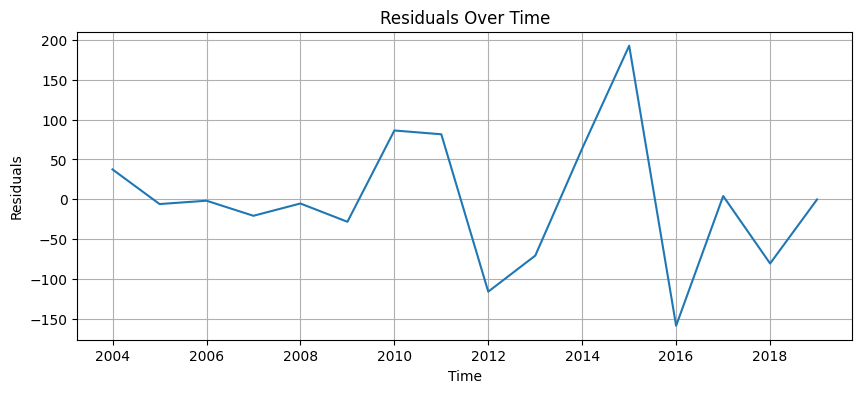

Summary statistics of residuals:
count     16.000000
mean      -1.325986
std       84.934765
min     -158.693663
25%      -38.805276
50%       -3.489102
75%       44.153201
max      192.847242
dtype: float64


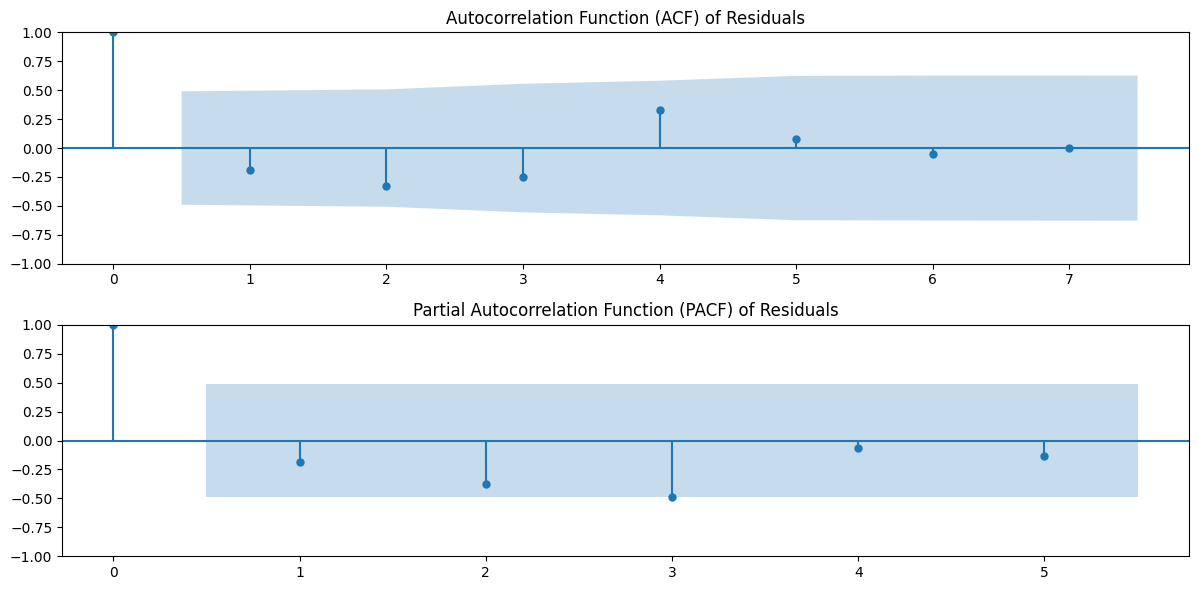

<Figure size 600x600 with 0 Axes>

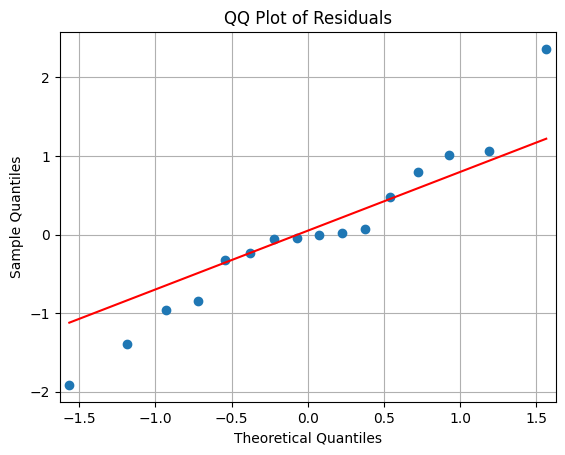

Ljung-Box test p-values:     lb_stat  lb_pvalue
7  7.018944    0.42691
Breusch-Pagan test p-value: 0.4906273373935792


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.statespace.sarimax import SARIMAX
import scipy.stats as stats



# Fit a SARIMAX model
order = (2, 1, 0)
seasonal_order = (2, 0, 0, 7)
model = SARIMAX(production, order=order, seasonal_order=seasonal_order)
results = model.fit()

# Calculate residuals
residuals = results.resid

# Plot residuals over time
plt.figure(figsize=(10, 4))
plt.plot(residuals)
plt.title('Residuals Over Time')
plt.xlabel('Time')
plt.ylabel('Residuals')
plt.grid(True)
plt.show()

# Summary statistics of residuals
print("Summary statistics of residuals:")
print(residuals.describe())

# Plot ACF and PACF of residuals
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
sm.graphics.tsa.plot_acf(residuals, lags=7, ax=plt.gca(), title='Autocorrelation Function (ACF) of Residuals')
plt.subplot(2, 1, 2)
sm.graphics.tsa.plot_pacf(residuals, lags=5, ax=plt.gca(), title='Partial Autocorrelation Function (PACF) of Residuals')
plt.tight_layout()
plt.show()

# QQ plot
plt.figure(figsize=(6, 6))
sm.qqplot(residuals, line='q', fit=True)
plt.title('QQ Plot of Residuals')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')
plt.grid(True)
plt.show()

# Conduct statistical tests (e.g., Ljung-Box test) for autocorrelation
lb_test = sm.stats.acorr_ljungbox(residuals, lags=[7])
print("Ljung-Box test p-values:", lb_test)

# Conduct statistical tests (e.g., Breusch-Pagan test) for heteroscedasticity
het_test = sm.stats.diagnostic.het_arch(residuals)
print("Breusch-Pagan test p-value:", het_test[1])


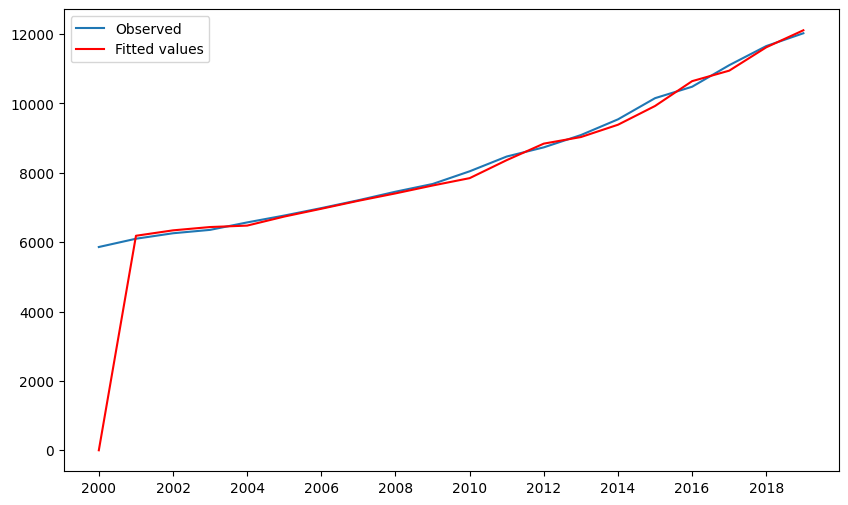

In [ ]:
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX

data = new_data["Year_production"]

# Your fixed values for p, d, and q
p_value = 2
d_value = 1
q_value = 0

# Your fixed values for P, D, Q, and m (seasonal parameters)
P_value = 2
D_value = 0
Q_value = 0
m_value = 7

# Create and fit the SARIMAX model with seasonal parameters
model = SARIMAX(data, order=(p_value, d_value, q_value), seasonal_order=(P_value, D_value, Q_value, m_value))
results = model.fit()

# Plot in-sample predictions
plt.figure(figsize=(10, 6))
plt.plot(data, label='Observed')
plt.plot(results.fittedvalues, color='red', label='Fitted values')
plt.legend()
plt.show()


Forecasted Values:
2020-01-01    12437.577284
2021-01-01    12866.538270
2022-01-01    13355.848756
2023-01-01    13684.658146
2024-01-01    14134.401981
2025-01-01    14528.723774
2026-01-01    14827.755127
Freq: AS-JAN, Name: predicted_mean, dtype: float64


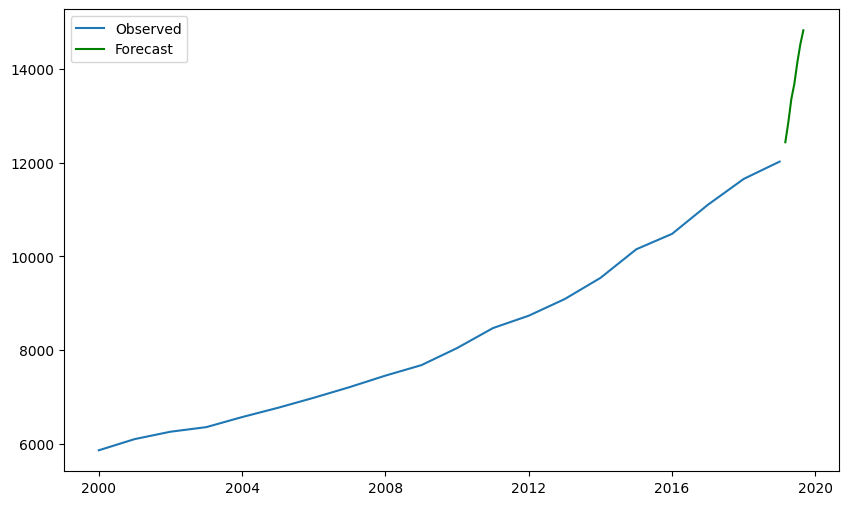

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA


data = new_data["Year_production"]

# Your fixed values for p, d, and q
p_value = 2
d_value = 1
q_value = 0

# Your fixed values for P, D, Q, and s (seasonal parameters)
P_value = 2
D_value = 0
Q_value = 0
s_value = 7


model = ARIMA(data, order=(p_value, d_value, q_value), seasonal_order=(P_value, D_value, Q_value, s_value))
results = model.fit()

# Forecast future values
forecast_steps = 7
forecast_index = pd.date_range(start=data.index[-1], periods=forecast_steps + 1, freq='M')[1:]
forecast = results.forecast(steps=forecast_steps)

# Print forecasted values
print("Forecasted Values:")
print(forecast)

# Plot observed data and forecasted values
plt.figure(figsize=(10, 6))
plt.plot(data, label='Observed')
plt.plot(forecast_index, forecast, color='green', label='Forecast')
plt.legend()
plt.show()


# Conclusion
The forecasting value is increasing therefore , Milk production has increasing Trend.